<a href="https://colab.research.google.com/github/Jyoti-Yadav2/Jyoti-yadav2/blob/main/KEGG_Pathway_Mapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# install required packages
!pip install bioservices pandas Matplotlib seaborn

In [19]:
# import libraries
from bioservices.kegg import KEGG
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# initialize KEGG
k = KEGG()
k.organism = "eco" # E. coli

In [21]:
# define gene list (E.coli gene IDs)
gene_ids = [
    'eco:b0002', #thrA
    'eco:b0003', #thrB
    'eco:b0004', #thrC
    'eco:b0005', # ilvC
    'eco:b0006', #ilvD
    'eco:b0007' #leuA
]

In [22]:
# fetch gene -> patgway links
results = []
for gene in gene_ids:
  try:
    pathways = k.link("pathway", gene)
    lines = pathways.strip().split('\n')
    for line in lines:
      gene_id, path_id = line.split('\t')
      path_id =path_id.replace("path:", "")
      results.append({"Gene": gene_id, "Pathway": path_id})
  except:
    print(f" Could not fetch pathway for {gene}")

 Could not fetch pathway for eco:b0005
 Could not fetch pathway for eco:b0006
 Could not fetch pathway for eco:b0007


In [23]:
# save to DataFrame
pathway_df = pd.DataFrame(results)
pathway_df.to_csv("KEGG_gene_pathways.csv", index=False)
print(" Pathway mapping saved as 'KEGG_gene_pathways.csv'")

 Pathway mapping saved as 'KEGG_gene_pathways.csv'


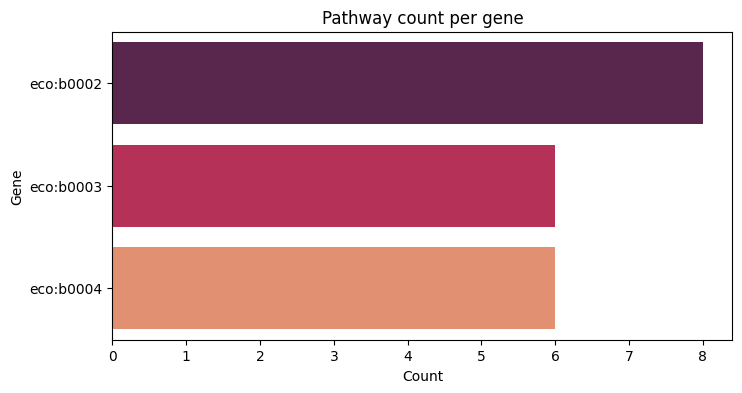

In [24]:
# bar chart: pathway count per gene
plt.figure(figsize=(8, 4))
sns.countplot(data=pathway_df, y='Gene', order=pathway_df['Gene'].value_counts().index, palette='rocket', hue='Gene', legend=False)
plt.title('Pathway count per gene')
plt.xlabel('Count')
plt.ylabel('Gene')

#save the file in png
plt.savefig("pathway_count_per_gene.png", bbox_inches='tight')
plt.show()